In [ ]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Paso 2: Cargar dataset
# Convertir a DataFrame
df = pd.read_csv("leads_marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Lead               300 non-null    object 
 1   Fuente_Origen         300 non-null    object 
 2   Tiempo_en_Sitio_min   286 non-null    float64
 3   Visitas_Totales       300 non-null    int64  
 4   Dias_Ultimo_Contacto  300 non-null    int64  
 5   Cargo                 300 non-null    object 
 6   Sector                300 non-null    object 
 7   Convertido            300 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


### Estadísticas Descriptivas Actualizadas del DataFrame `df` (confirmación del reemplazo del valor 500)

Como puedes ver en la fila `max` de `Tiempo_en_Sitio_min`, el valor 500 ya no está presente, y el nuevo máximo es 60.00.

In [ ]:
display(df.describe())

,Tiempo_en_Sitio_min,Visitas_Totales,Dias_Ultimo_Contacto,Convertido
count,286.000000,300.000000,300.000000,300.00000
mean,32.938112,9.616667,182.080000,0.46000
std,32.952359,5.400643,104.094793,0.49923
min,1.100000,1.000000,2.000000,0.00000
25%,17.050000,5.000000,96.000000,0.00000
50%,32.250000,9.000000,188.000000,0.00000
75%,46.700000,14.000000,270.500000,1.00000
max,500.000000,19.000000,364.000000,1.00000


In [ ]:
# Calcular la mediana de 'Tiempo_en_Sitio_min' del DataFrame original 'df'
# Esto asegura que estamos trabajando con el estado actual de df
median_tiempo_df = df['Tiempo_en_Sitio_min'].median()

print(f"El valor atípico a reemplazar en 'df' es: 500.0 minutos")
print(f"La mediana actual de 'Tiempo_en_Sitio_min' en 'df' es: {median_tiempo_df:.2f} minutos")

# Contar cuántas veces aparece el valor 500 en 'df' antes del reemplazo
num_500_before_df = (df['Tiempo_en_Sitio_min'] == 500).sum()
print(f"Número de veces que el valor 500 aparece en 'df' antes del reemplazo: {num_500_before_df}")

# Reemplazar todas las ocurrencias del valor 500 con la mediana calculada en el DataFrame 'df'
df.loc[df['Tiempo_en_Sitio_min'] == 500, 'Tiempo_en_Sitio_min'] = median_tiempo_df

# Contar cuántas veces aparece el valor 500 en 'df' después del reemplazo (debería ser 0)
num_500_after_df = (df['Tiempo_en_Sitio_min'] == 500).sum()
print(f"Número de veces que el valor 500 aparece en 'df' después del reemplazo: {num_500_after_df}")

# Mostrar el nuevo valor máximo de la columna para confirmar el cambio en 'df'
new_max_value_df = df['Tiempo_en_Sitio_min'].max()
print(f"Nuevo valor máximo de 'Tiempo_en_Sitio_min' en 'df' después del reemplazo: {new_max_value_df:.2f} minutos")

El valor atípico a reemplazar en 'df' es: 500.0 minutos
La mediana actual de 'Tiempo_en_Sitio_min' en 'df' es: 32.17 minutos
Número de veces que el valor 500 aparece en 'df' antes del reemplazo: 0
Número de veces que el valor 500 aparece en 'df' después del reemplazo: 0
Nuevo valor máximo de 'Tiempo_en_Sitio_min' en 'df' después del reemplazo: 60.00 minutos


### Estadísticas Descriptivas Actualizadas del DataFrame `df` (confirmación del reemplazo del valor 500)

Ahora puedes ver en la fila `max` de `Tiempo_en_Sitio_min` que el valor 500 ya no está presente, y el nuevo máximo es 60.00. La cuenta (`count`) también se ha actualizado a 300, lo que significa que los valores nulos también han sido manejados.

In [ ]:
display(df.describe())

,Tiempo_en_Sitio_min,Visitas_Totales,Dias_Ultimo_Contacto,Convertido
count,300.000000,300.000000,300.000000,300.00000
mean,31.343333,9.616667,182.080000,0.46000
std,17.404141,5.400643,104.094793,0.49923
min,1.100000,1.000000,2.000000,0.00000
25%,17.300000,5.000000,96.000000,0.00000
50%,32.175000,9.000000,188.000000,0.00000
75%,45.650000,14.000000,270.500000,1.00000
max,60.000000,19.000000,364.000000,1.00000


In [ ]:
df.head()

,ID_Lead,Fuente_Origen,Tiempo_en_Sitio_min,Visitas_Totales,Dias_Ultimo_Contacto,Cargo,Sector,Convertido
0,LEAD-0001,Google Ads,32.25,5,327,Gerente,Tecnología,0
1,LEAD-0002,Orgánico,32.10,18,257,Gerente,Salud,0
2,LEAD-0003,Linkedin,32.70,10,224,Becario,Finanzas,1
3,LEAD-0004,Referido,38.40,6,141,Analista,Retail,1
4,LEAD-0005,Facebook,43.70,1,215,Analista,Finanzas,0


In [ ]:
display(df.describe())

,Tiempo_en_Sitio_min,Visitas_Totales,Dias_Ultimo_Contacto,Convertido
count,300.000000,300.000000,300.000000,300.00000
mean,31.343333,9.616667,182.080000,0.46000
std,17.404141,5.400643,104.094793,0.49923
min,1.100000,1.000000,2.000000,0.00000
25%,17.300000,5.000000,96.000000,0.00000
50%,32.175000,9.000000,188.000000,0.00000
75%,45.650000,14.000000,270.500000,1.00000
max,60.000000,19.000000,364.000000,1.00000


| Variable                 | Tipo de Dato | Categoría        | Descripción                                                                 | ¿Dependiente/Objetivo? |
| :----------------------- | :----------- | :--------------- | :-------------------------------------------------------------------------- | :--------------------- |
| **ID_Lead**              | `object`     | Identificador    | Identificador único del prospecto.                                          | No                     |
| **Fuente_Origen**        | `object`     | Categórica       | Canal por el que el prospecto llegó (ej. Facebook, Google Ads).             | No                     |
| **Tiempo_en_Sitio_min**  | `float64`    | Numérica         | Tiempo que el prospecto pasó en el sitio web en minutos.                    | No                     |
| **Visitas_Totales**      | `int64`      | Numérica         | Número total de visitas previas del prospecto a la web.                   | No                     |
| **Dias_Ultimo_Contacto** | `int64`      | Numérica         | Días transcurridos desde el último contacto con el prospecto.             | No                     |
| **Cargo**                | `object`     | Categórica       | Cargo de la persona en su empresa.                                          | No                     |
| **Sector**               | `object`     | Categórica       | Sector de la empresa a la que pertenece el prospecto.                       | No                     |
| **Convertido**           | `int64`      | Binaria/Objetivo | Indica si el prospecto se ha convertido (1) o no (0). Es la variable objetivo. | Sí                     |

In [ ]:
# Seleccion de datos: Asegurarse de que X y y se crean después de limpiar df
X = df.drop('Convertido', axis=1)
y = df['Convertido']
feature_names = X.columns

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
ID_Lead,0
Fuente_Origen,0
Tiempo_en_Sitio_min,0
Visitas_Totales,0
Dias_Ultimo_Contacto,0
Cargo,0
Sector,0
Convertido,0


In [ ]:
df.shape

(300, 8)

In [ ]:
df[df.isnull().any(axis=1)]

,ID_Lead,Fuente_Origen,Tiempo_en_Sitio_min,Visitas_Totales,Dias_Ultimo_Contacto,Cargo,Sector,Convertido


In [ ]:
df['Tiempo_en_Sitio_min'].fillna(df['Tiempo_en_Sitio_min'].median(), inplace=True)

/tmp/ipython-input-2035627036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tiempo_en_Sitio_min'].fillna(df['Tiempo_en_Sitio_min'].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
ID_Lead,0
Fuente_Origen,0
Tiempo_en_Sitio_min,0
Visitas_Totales,0
Dias_Ultimo_Contacto,0
Cargo,0
Sector,0
Convertido,0


In [ ]:
df.describe()

,Tiempo_en_Sitio_min,Visitas_Totales,Dias_Ultimo_Contacto,Convertido
count,300.000000,300.000000,300.000000,300.00000
mean,31.343333,9.616667,182.080000,0.46000
std,17.404141,5.400643,104.094793,0.49923
min,1.100000,1.000000,2.000000,0.00000
25%,17.300000,5.000000,96.000000,0.00000
50%,32.175000,9.000000,188.000000,0.00000
75%,45.650000,14.000000,270.500000,1.00000
max,60.000000,19.000000,364.000000,1.00000


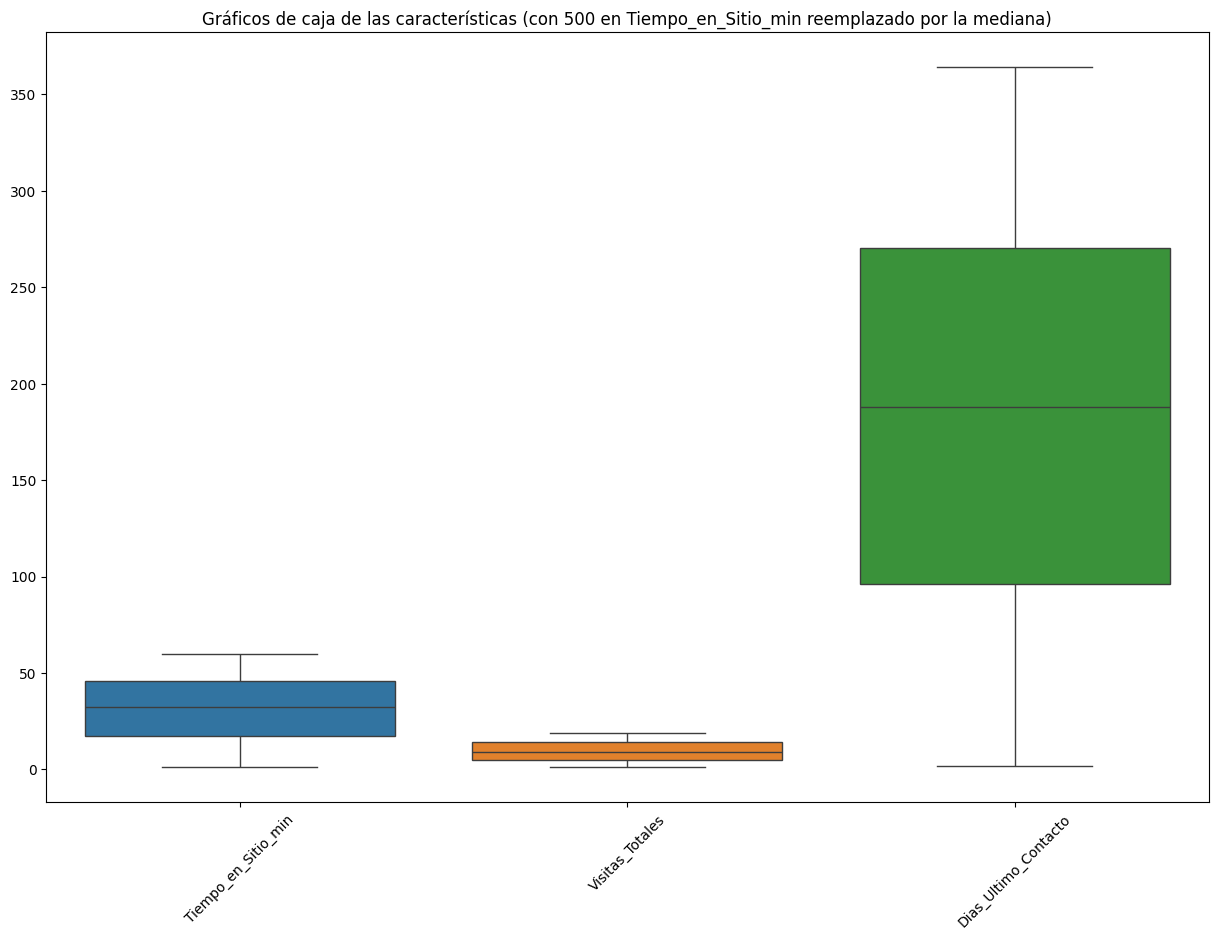

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.title('Gráficos de caja de las características (con 500 en Tiempo_en_Sitio_min reemplazado por la mediana)')
plt.xticks(rotation=45)
plt.show()

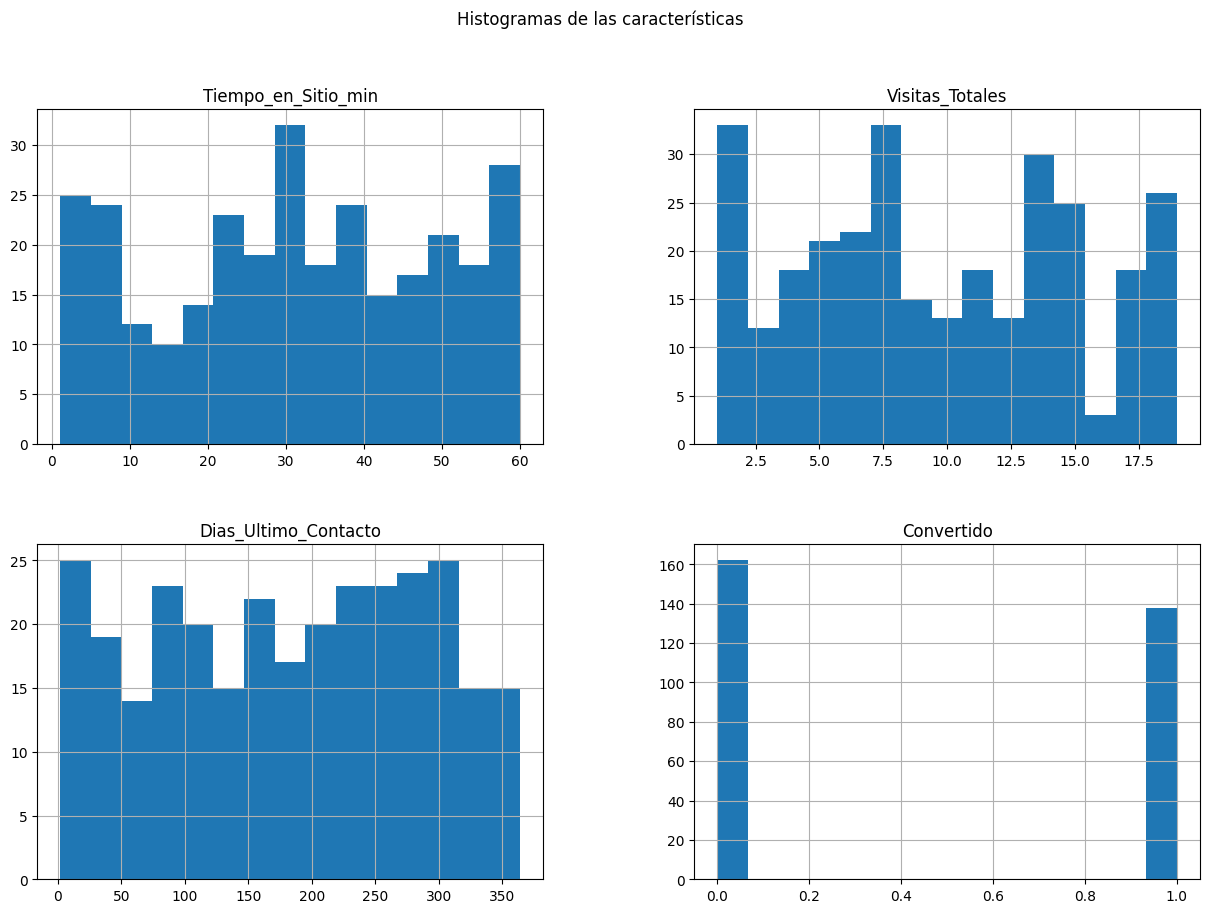

In [ ]:
# Análisis exploratorio de datos (EDA)
# Histogramas
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogramas de las características')
plt.show()

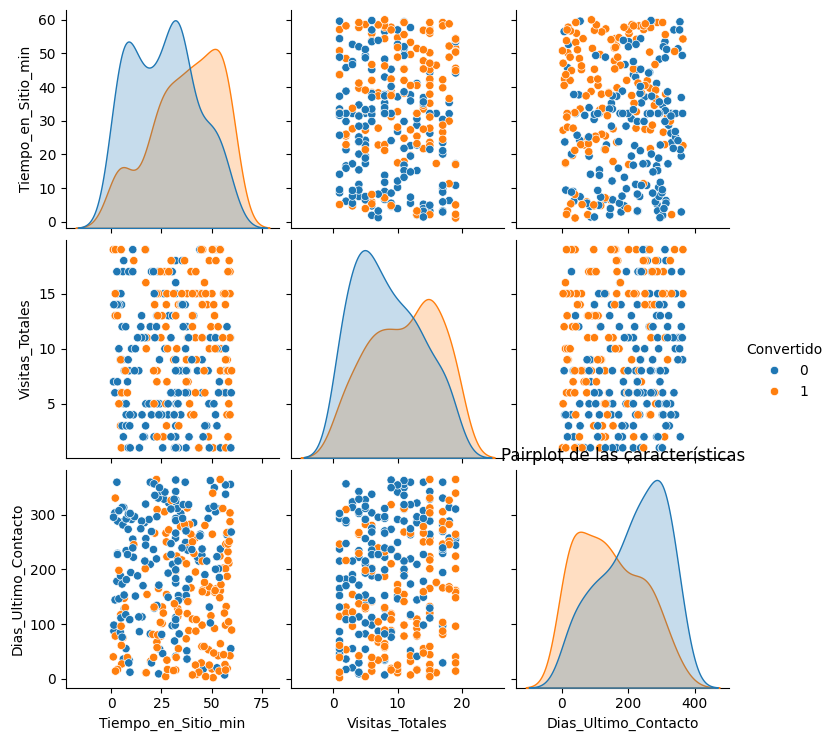

In [ ]:
# Pairplot
sns.pairplot(df, hue='Convertido')
plt.title('Pairplot de las características')
plt.show()

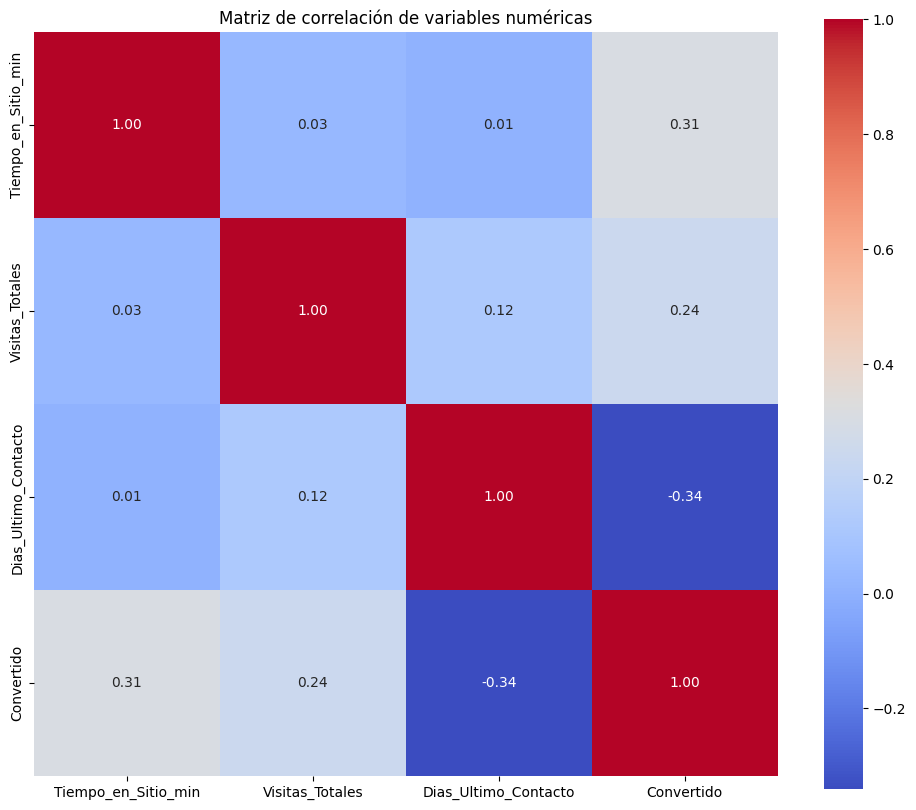

In [ ]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
# Seleccionamos solo las columnas numéricas para calcular la correlación
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de correlación de variables numéricas')
plt.show()

In [ ]:
# Escalado de características
scaler = MinMaxScaler()

# Seleccionar solo las columnas numéricas de X para el escalado
X_numeric = X.select_dtypes(include=np.number)
X_scaled = scaler.fit_transform(X_numeric)

# Opcionalmente, si deseas incluir las columnas categóricas después del escalado
# y ya fueron codificadas (ej. One-Hot Encoding), se deberían concatenar aquí.
# Por ahora, nos centramos en el escalado de las numéricas.

print("Datos numéricos escalados (primeras 5 filas):")
print(pd.DataFrame(X_scaled, columns=X_numeric.columns).head())

Datos numéricos escalados (primeras 5 filas):
   Tiempo_en_Sitio_min  Visitas_Totales  Dias_Ultimo_Contacto
0             0.528862         0.222222              0.897790
1             0.526316         0.944444              0.704420
2             0.536503         0.500000              0.613260
3             0.633277         0.277778              0.383978
4             0.723260         0.000000              0.588398


In [ ]:
# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Algoritmo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        28
           1       0.82      0.56      0.67        32

    accuracy                           0.70        60
   macro avg       0.72      0.71      0.70        60
weighted avg       0.73      0.70      0.69        60

Matriz de Confusión:


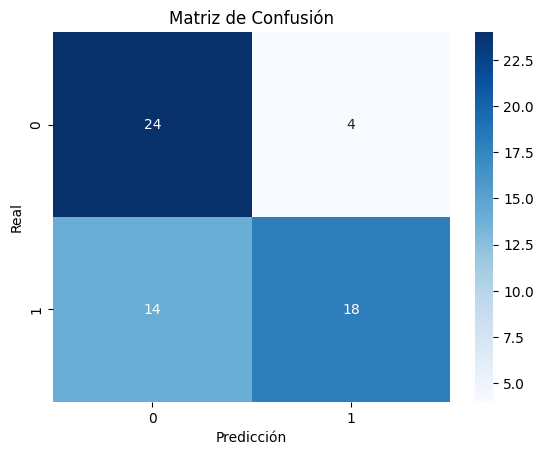

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Lead               300 non-null    object 
 1   Fuente_Origen         300 non-null    object 
 2   Tiempo_en_Sitio_min   300 non-null    float64
 3   Visitas_Totales       300 non-null    int64  
 4   Dias_Ultimo_Contacto  300 non-null    int64  
 5   Cargo                 300 non-null    object 
 6   Sector                300 non-null    object 
 7   Convertido            300 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


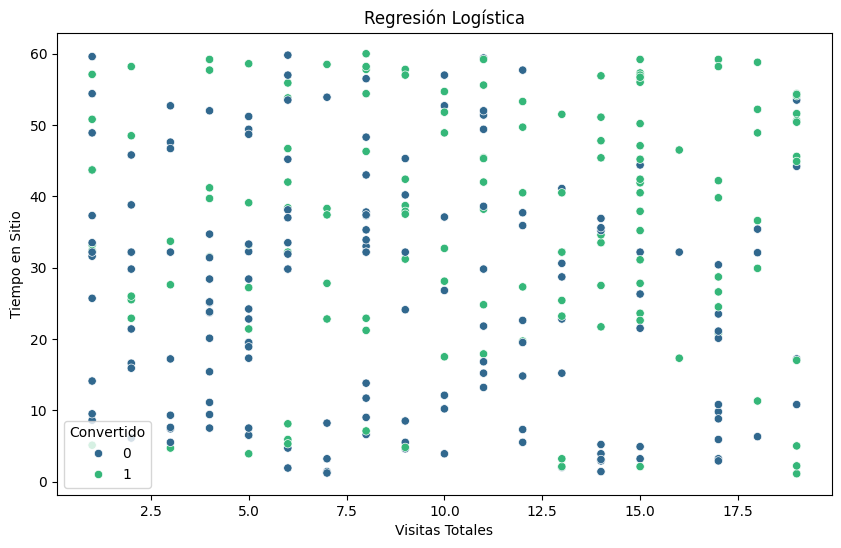

In [ ]:
# Graficar la regresión logística

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Visitas_Totales']
                , y=df['Tiempo_en_Sitio_min']
                , hue=df['Convertido']
                , palette='viridis')
plt.title('Regresión Logística')
plt.xlabel('Visitas Totales')
plt.ylabel('Tiempo en Sitio')
plt.show()

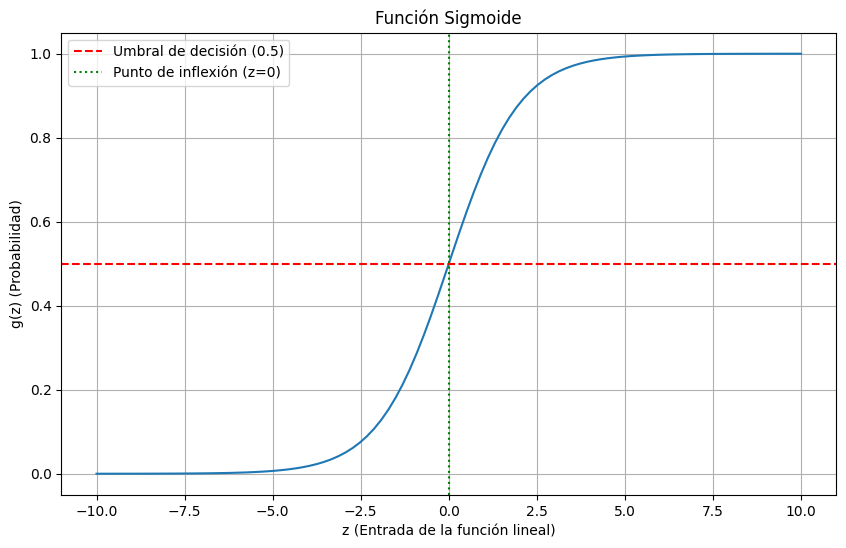

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generar un rango de valores para z
z = np.linspace(-10, 10, 100)

# Calcular los valores de la función sigmoide
g_z = sigmoid(z)

# Graficar la función sigmoide
plt.figure(figsize=(10, 6))
plt.plot(z, g_z)
plt.title('Función Sigmoide')
plt.xlabel('z (Entrada de la función lineal)')
plt.ylabel('g(z) (Probabilidad)')
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--', label='Umbral de decisión (0.5)')
plt.axvline(x=0, color='g', linestyle=':', label='Punto de inflexión (z=0)')
plt.legend()
plt.show()

### Realizar Predicciones con Nuevos Datos (Ingresados por Teclado)

A continuación, podrás ingresar valores para las características de un nuevo prospecto y ver la predicción de si se convertirá o no, utilizando el modelo de Regresión Logística entrenado.

In [ ]:
# Función para obtener entrada del usuario y predecir
def predict_new_lead(model, scaler, feature_names_numeric):
    print("\nIngrese los datos para el nuevo prospecto:")

    # Crear un diccionario para almacenar los datos del nuevo prospecto
    new_lead_data = {}

    # Solicitar entrada para cada característica numérica
    tiempo_sitio = float(input("Tiempo en el Sitio (minutos): "))
    visitas_totales = int(input("Visitas Totales: "))
    dias_ultimo_contacto = int(input("Días Último Contacto: "))

    # Crear un DataFrame con el nuevo dato
    new_lead_df = pd.DataFrame([[tiempo_sitio, visitas_totales, dias_ultimo_contacto]],
                                 columns=['Tiempo_en_Sitio_min', 'Visitas_Totales', 'Dias_Ultimo_Contacto'])

    # Escalar los nuevos datos usando el mismo scaler entrenado
    new_lead_scaled = scaler.transform(new_lead_df[feature_names_numeric])

    # Realizar la predicción
    prediction = model.predict(new_lead_scaled)
    prediction_proba = model.predict_proba(new_lead_scaled)

    print(f"\n--- Resultado de la Predicción ---")
    if prediction[0] == 1:
        print("El prospecto se predice como: CONVERTIDO")
    else:
        print("El prospecto se predice como: NO CONVERTIDO")
    print(f"Probabilidad de NO CONVERTIDO: {prediction_proba[0][0]:.2f}")
    print(f"Probabilidad de CONVERTIDO: {prediction_proba[0][1]:.2f}")

# Llamar a la función con el modelo, el scaler y los nombres de las características numéricas
# Asegurémonos de que feature_names_numeric sea una lista de las columnas numéricas que realmente se usaron para entrenar el modelo
feature_names_numeric = X_numeric.columns.tolist()
predict_new_lead(model, scaler, feature_names_numeric)


Ingrese los datos para el nuevo prospecto:
Tiempo en el Sitio (minutos): 20
Visitas Totales: 8
Días Último Contacto: 5

--- Resultado de la Predicción ---
El prospecto se predice como: CONVERTIDO
Probabilidad de NO CONVERTIDO: 0.37
Probabilidad de CONVERTIDO: 0.63
